In [2]:
## Imports

import math
import numpy as np
import pandas as pd
import scipy.stats

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

# Notebook Explanation
- This notebook will give a high level overview of the data. It will include plots that we will use to describe the data in our presentation. There is no alteration or data cleaning as it is right now. We are simply identifying trends within the given sets. 

## Data Imports
- Original Data located in root directory

In [7]:
train = pd.read_csv('../Data/train.csv')
test = pd.read_csv('../Data/test.csv')

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Evaluation of the Target Variable, SalePrice

In [10]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

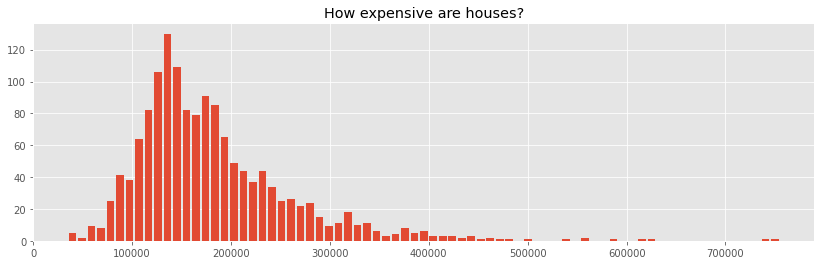

In [8]:
train.SalePrice.hist(bins=75, rwidth=.8, figsize=(14,4))
plt.title('How expensive are houses?')
plt.show()

Skew Value: 1.8828757597682129


<AxesSubplot:>

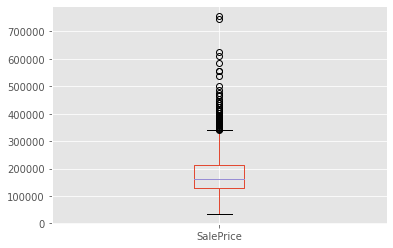

In [11]:
## Distribution of the y variable appears very right-skewed. We will possibly have to transform it in some way. Here is a boxplot and calculation of skewness value.

print('Skew Value:', train['SalePrice'].skew(axis=0))

train.boxplot(column='SalePrice', return_type='axes')

- The cheapest house sold for $34,900 and the most expensive sold for $755,000
- Average Sale Price was $180,921, and the median is $163,000.

Histogram is skewed to the right. Outliers are slightly dragging out the mean

## How old are the exisiting houses?

Oldest house built in 1872. Newest house built in 2010.


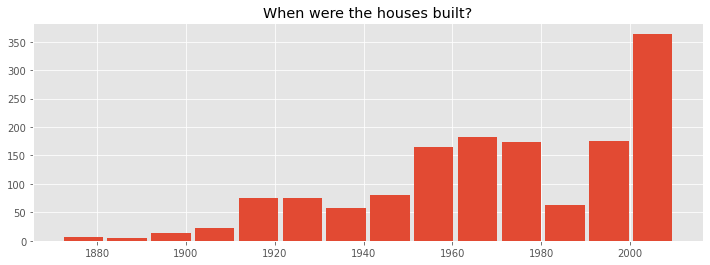

In [12]:
print('Oldest house built in {}. Newest house built in {}.'.format(
    train.YearBuilt.min(), train.YearBuilt.max()))
train.YearBuilt.hist(bins=14, rwidth=.9, figsize=(12,4))
plt.title('When were the houses built?')
plt.show()

## Is there any seasonality in home sales?

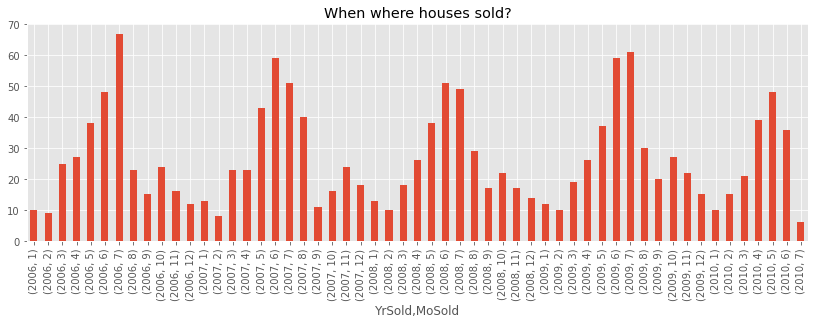

In [13]:
train.groupby(['YrSold','MoSold']).Id.count().plot(kind='bar', figsize=(14,4))
plt.title('When where houses sold?')
plt.show()

- There is most definitely seasonality at play here. There is almost always Peaks in July and August every year. Month and Year sold could have a huge effect on sale price. Keep in mind that this data was collected around the 2008 Housing Crisis.

## Where are the majority of the Houses? We have a Neighborhood field. Lets see which neighborhoods are the most popular

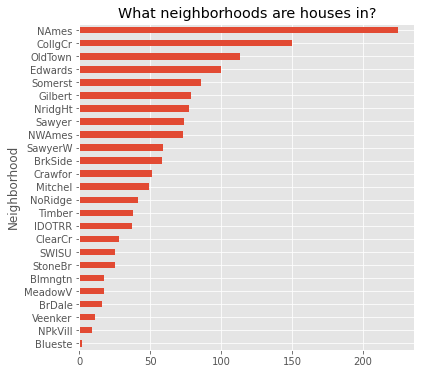

In [14]:
train.groupby('Neighborhood').Id.count().\
    sort_values().\
    plot(kind='barh', figsize=(6,6))
plt.title('What neighborhoods are houses in?')
plt.show()

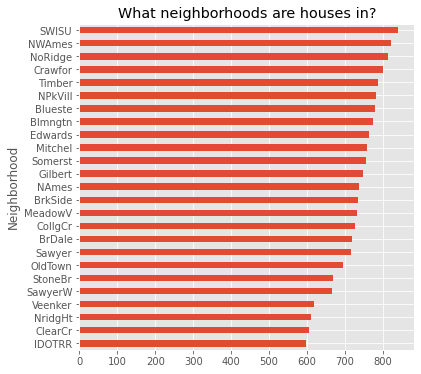

In [17]:
train.groupby('Neighborhood').Id.mean().\
    sort_values().\
    plot(kind='barh', figsize=(6,6))
plt.title('What neighborhoods are houses in?')
plt.show()

Despite a large majority of houses being in the top 3 or 4 neighborhoods, there is likely an association between neighborhood and SalePrice. As the old saying goes, "location, location, location". What's interesting is that average house prices by neighborhood don't match up with the counts. NAmes is an average neighborhood in terms of sale price, but it has the most homes sold. SWISU is one of the neighborhoods with the least amount of sales, but the highest average price.

## How big are houses? Lots?

The average house has 1,515 sq ft of space, the median 1,464 sq ft
The biggest house has 5,642 sq ft of space, the smallest 334 sq ft


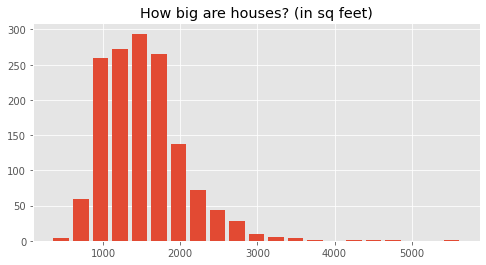

In [15]:
print('The average house has {:,.0f} sq ft of space, the median {:,.0f} sq ft'.format(
    train.GrLivArea.mean(), train.GrLivArea.median()))
print('The biggest house has {:,.0f} sq ft of space, the smallest {:,.0f} sq ft'.format(
    train.GrLivArea.max(), train.GrLivArea.min()))
train.GrLivArea.hist(bins=21, rwidth=.8, figsize=(8,4))
plt.title('How big are houses? (in sq feet)')
plt.show()

The average lot is 0.24 acres, the median 0.22 acres
The biggest lot is 4.94 acres, the smallest 0.03 acres


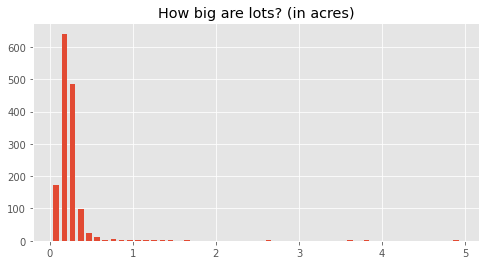

In [16]:
sqft_to_acres = 43560.
print('The average lot is {:,.2f} acres, the median {:,.2f} acres'.format(
    train.LotArea.mean()/sqft_to_acres, train.LotArea.median()/sqft_to_acres))
print('The biggest lot is {:,.2f} acres, the smallest {:,.2f} acres'.format(
    train.LotArea.max()/sqft_to_acres, train.LotArea.min()/sqft_to_acres))
(train.LotArea/sqft_to_acres).hist(bins=50, rwidth=.7, figsize=(8,4))
plt.title('How big are lots? (in acres)')
plt.show()